# 1.3.2. Numerical operations on arrays

## 1.3.2.1. Elementwise operations

### 1.3.2.1.1. Basic operations

With scalars.

In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [3]:
2**a

array([ 2,  4,  8, 16])

All arithmetic operates elementwise.

In [4]:
b = np.ones(4) + 1
b

array([ 2.,  2.,  2.,  2.])

In [5]:
a - b

array([-1.,  0.,  1.,  2.])

In [6]:
a * b

array([ 2.,  4.,  6.,  8.])

In [7]:
j = np.arange(5)
j

array([0, 1, 2, 3, 4])

In [8]:
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

These operations are of course much faster than if you did them in pure Python.

In [11]:
a = np.arange(10000)
%timeit a + 1
l = range(10000)
%timeit [i+1 for i in l]

The slowest run took 6.87 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.37 µs per loop
1000 loops, best of 3: 676 µs per loop


Array multiplication is not matrix multiplication.

In [13]:
c = np.ones((3, 3))
c * c # NOT matrix multiplication!

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [14]:
c.dot(c) # matrix multiplication

array([[ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.]])

#### Exercise: Elementwise operations
Try simple arithmetic elementwise operations: add even elements with odd elements.

Time them against their pure python counterparts using %timeit.


In [37]:
a = np.arange(0, 1000, 1)
%timeit a[0::2] + a[1::2] 

The slowest run took 10.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.89 µs per loop


In [38]:
a = list(range(0, 1000))
%timeit [even + odd for even, odd in zip(a[::2], a[1::2])]

10000 loops, best of 3: 41.3 µs per loop


Generate:
```
[2**0, 2**1, 2**2, 2**3, 2**4]
```

In [39]:
[2**0, 2**1, 2**2, 2**3, 2**4]

[1, 2, 4, 8, 16]

In [41]:
np.array([2]*5)**np.arange(0, 5)

array([ 1,  2,  4,  8, 16])

```
a_j = 2^(3*j) - j
```

In [42]:
j = np.arange(5)
a_j = 2**(3 * j) - j
a_j

array([   1,    7,   62,  509, 4092])

### 1.3.2.1.2. Other operations

#### Comparisons

In [43]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True], dtype=bool)

In [44]:
a > b

array([False, False,  True, False], dtype=bool)

Array-wise comparisons.

In [45]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [46]:
np.array_equal(a, c)

True

#### Logical operations

In [47]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False], dtype=bool)

In [12]:
np.logical_and(a, b)

array([ True, False, False, ..., False, False, False], dtype=bool)

#### Transcendental functions

In [49]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [50]:
np.log(a)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436])

In [51]:
np.exp(a)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

#### Shape mismatches

In [53]:
a = np.arange(4)
a + np.array([1, 2])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

#### Transposition

In [13]:
a = np.triu(np.ones((3, 3)))
a

array([[ 1.,  1.,  1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  1.]])

In [14]:
a.T

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.]])

The transposition is a view.

As a results, the following code is wrong and will not make a matrix symmetric:
```
a += a.T
```
It will work for small arrays (because of buffering) but fail for large one, in unpredictable ways.

#### Note Linear algebra
The sub-module numpy.linalg implements basic linear algebra, such as solving linear systems, singular value decomposition, etc. However, it is not guaranteed to be compiled using efficient routines, and thus we recommend the use of scipy.linalg, as detailed in section Linear algebra operations: scipy.linalg

#### Exercise other operations
Look at the help for np.allclose. When might this be useful?

In [62]:
help(np.allclose)

Help on function allclose in module numpy.core.numeric:

allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
    Returns True if two arrays are element-wise equal within a tolerance.
    
    The tolerance values are positive, typically very small numbers.  The
    relative difference (`rtol` * abs(`b`)) and the absolute difference
    `atol` are added together to compare against the absolute difference
    between `a` and `b`.
    
    If either array contains one or more NaNs, False is returned.
    Infs are treated as equal if they are in the same place and of the same
    sign in both arrays.
    
    Parameters
    ----------
    a, b : array_like
        Input arrays to compare.
    rtol : float
        The relative tolerance parameter (see Notes).
    atol : float
        The absolute tolerance parameter (see Notes).
    equal_nan : bool
        Whether to compare NaN's as equal.  If True, NaN's in `a` will be
        considered equal to NaN's in `b` in the output array.
   

In [61]:
np.allclose(np.ones((3, 3)), np.ones((3, 3)))

True

Look at the help for np.triu and np.tril.

In [60]:
help(np.triu)

Help on function triu in module numpy.lib.twodim_base:

triu(m, k=0)
    Upper triangle of an array.
    
    Return a copy of a matrix with the elements below the `k`-th diagonal
    zeroed.
    
    Please refer to the documentation for `tril` for further details.
    
    See Also
    --------
    tril : lower triangle of an array
    
    Examples
    --------
    >>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
    array([[ 1,  2,  3],
           [ 4,  5,  6],
           [ 0,  8,  9],
           [ 0,  0, 12]])



In [78]:
np.triu(np.ones((3, 3)))

array([[ 1.,  1.,  1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  1.]])

In [73]:
help(np.tril)

Help on function tril in module numpy.lib.twodim_base:

tril(m, k=0)
    Lower triangle of an array.
    
    Return a copy of an array with elements above the `k`-th diagonal zeroed.
    
    Parameters
    ----------
    m : array_like, shape (M, N)
        Input array.
    k : int, optional
        Diagonal above which to zero elements.  `k = 0` (the default) is the
        main diagonal, `k < 0` is below it and `k > 0` is above.
    
    Returns
    -------
    tril : ndarray, shape (M, N)
        Lower triangle of `m`, of same shape and data-type as `m`.
    
    See Also
    --------
    triu : same thing, only for the upper triangle
    
    Examples
    --------
    >>> np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
    array([[ 0,  0,  0],
           [ 4,  0,  0],
           [ 7,  8,  0],
           [10, 11, 12]])



In [77]:
np.tril(np.ones((3, 3)))

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.]])

## 1.3.2.2. Basic reductions

### 1.3.2.2.1. Computing sums

In [79]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [80]:
x.sum()

10

Sum by rows and by columns.

In [15]:
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

In [16]:
x.sum(axis=0) # sum columns

array([4, 6])

In [17]:
x[:, 0].sum(), x[:, 1].sum()

(4, 6)

In [18]:
x.sum(axis=1) # sum rows

array([3, 7])

In [19]:
x[0, :].sum(), x[1, :].sum()

(3, 7)

Same idea in higher dimensions.

In [89]:
x = np.random.rand(2, 2, 2)
x

array([[[ 0.86696146,  0.57683757],
        [ 0.02896998,  0.78566632]],

       [[ 0.15187027,  0.85272236],
        [ 0.38461935,  0.86144351]]])

In [90]:
x.sum(axis=2)[0, 1]

0.81463629637940016

In [91]:
x[0, 1, :].sum()

0.81463629637940016

### 1.3.2.2.2. Other reductions

#### Extrema

In [92]:
x = np.array([1, 3, 2])
x.min()

1

In [93]:
x.max()

3

In [94]:
x.argmin()

0

In [95]:
x.argmax()

1

#### Logical operations

In [96]:
np.all([True, True, False])

False

In [97]:
np.any([True, True, False])

True

Can be used for array comparisons.

In [98]:
a = np.zeros((100, 100))
np.any(a != 0)

False

In [21]:
np.all(a == a)

True

In [22]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((c <= b) & (b <= c)).all()

False

#### Statistics

In [23]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [24]:
np.median(x)

1.5

In [28]:
np.median(y, axis=1) # last axis

array([ 2.,  5.])

In [104]:
x.std() # full population standard deviation

0.82915619758884995

...and many more (best to learn as you go).

#### Exercise: Reductions

Given there is a sum, what other function might you expect to see?

What is the difference between sum and cumsum?

In [108]:
x

array([1, 2, 3, 1])

In [106]:
np.sum(x)

7

In [107]:
np.cumsum(x)

array([1, 3, 6, 7])

#### Worked Example: data statistics

Data in populations.txt describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years.

You can view the data in an editor, or alternatively in IPython (both shell and notebook).

In [110]:
!cat data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


First, load the data into a NumPy array.

In [31]:
data = np.loadtxt("data/populations.txt")
year, hares, lynxes, carrots = data.T # trick - columns to variables

In [32]:
data.T

array([[  1900.,   1901.,   1902.,   1903.,   1904.,   1905.,   1906.,
          1907.,   1908.,   1909.,   1910.,   1911.,   1912.,   1913.,
          1914.,   1915.,   1916.,   1917.,   1918.,   1919.,   1920.],
       [ 30000.,  47200.,  70200.,  77400.,  36300.,  20600.,  18100.,
         21400.,  22000.,  25400.,  27100.,  40300.,  57000.,  76600.,
         52300.,  19500.,  11200.,   7600.,  14600.,  16200.,  24700.],
       [  4000.,   6100.,   9800.,  35200.,  59400.,  41700.,  19000.,
         13000.,   8300.,   9100.,   7400.,   8000.,  12300.,  19500.,
         45700.,  51100.,  29700.,  15800.,   9700.,  10100.,   8600.],
       [ 48300.,  48200.,  41500.,  38200.,  40600.,  39800.,  38600.,
         42300.,  44500.,  42100.,  46000.,  46800.,  43800.,  40900.,
         39400.,  39000.,  36700.,  41800.,  43300.,  41300.,  47300.]])

Then plot it.

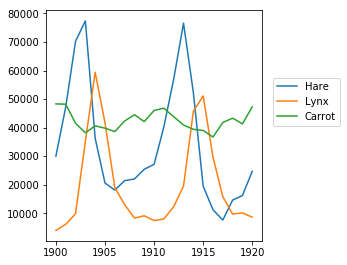

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(("Hare", "Lynx", "Carrot"), loc=(1.05, 0.5))

The mean populations over time.

In [120]:
populations = data[:, 1:]
populations

array([[ 30000.,   4000.,  48300.],
       [ 47200.,   6100.,  48200.],
       [ 70200.,   9800.,  41500.],
       [ 77400.,  35200.,  38200.],
       [ 36300.,  59400.,  40600.],
       [ 20600.,  41700.,  39800.],
       [ 18100.,  19000.,  38600.],
       [ 21400.,  13000.,  42300.],
       [ 22000.,   8300.,  44500.],
       [ 25400.,   9100.,  42100.],
       [ 27100.,   7400.,  46000.],
       [ 40300.,   8000.,  46800.],
       [ 57000.,  12300.,  43800.],
       [ 76600.,  19500.,  40900.],
       [ 52300.,  45700.,  39400.],
       [ 19500.,  51100.,  39000.],
       [ 11200.,  29700.,  36700.],
       [  7600.,  15800.,  41800.],
       [ 14600.,   9700.,  43300.],
       [ 16200.,  10100.,  41300.],
       [ 24700.,   8600.,  47300.]])

In [121]:
populations.mean(axis=0)

array([ 34080.95238095,  20166.66666667,  42400.        ])

The sample standard deviations.

In [122]:
populations.std(axis=0)

array([ 20897.90645809,  16254.59153691,   3322.50622558])

Which species has the highest population each year?

In [123]:
np.argmax(populations, axis=1)

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2])

## 1.3.2.3 Broadcasting

Basic operations on numpy arrays (addition, etc.) are elementwise.

This works on arrays of the same size.

Nevertheless, It’s also possible to do operations on arrays of different
sizes if NumPy can transform these arrays so that they all have
the same size: this conversion is called broadcasting.

The image below gives an example of broadcasting:
http://www.scipy-lectures.org/_images/numpy_broadcasting.png

In [127]:
np.arange(0, 40, 10)

array([ 0, 10, 20, 30])

In [129]:
np.tile(np.arange(0, 40, 10), (3, 1))

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

In [130]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [131]:
b = np.array([0, 1, 2])
b

array([0, 1, 2])

In [132]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

We have already used broadcasting without knowing it.

In [134]:
a = np.ones((4, 5))
a

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [135]:
a[0] = 2 # we assign an array of dimesion 0 to an array of dimension 1
a

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

An useful trick.

In [136]:
a = np.arange(0, 40, 10)
a

array([ 0, 10, 20, 30])

In [137]:
a.shape

(4,)

In [138]:
a = a[:, np.newaxis] # adds a new axis -> 2D array
a

array([[ 0],
       [10],
       [20],
       [30]])

In [139]:
a.shape

(4, 1)

In [140]:
b

array([0, 1, 2])

In [141]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Broadcasting seems a bit magical, but it is actually quite natural to use it when we want to solve a problem whose output data is an array with more dimensions than input data.

#### Worked Example: Broadcasting
Let’s construct an array of distances (in miles) between cities of Route 66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles.

In [34]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

In [37]:
mileposts

array([   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448])

In [38]:
mileposts[:, np.newaxis]

array([[   0],
       [ 198],
       [ 303],
       [ 736],
       [ 871],
       [1175],
       [1475],
       [1544],
       [1913],
       [2448]])

In [39]:
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array # !!!

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

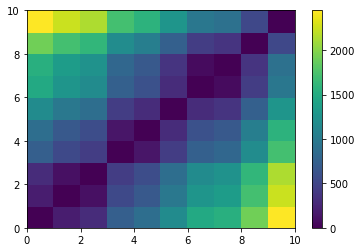

In [152]:
plt.pcolor(distance_array)
plt.colorbar()

#### Worked Example: Broadcasting

A lot of grid-based or network-based problems can also use broadcasting. For instance, if we want to compute the distance from the origin of points on a 10x10 grid, we can do.

In [147]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x**2 + y**2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

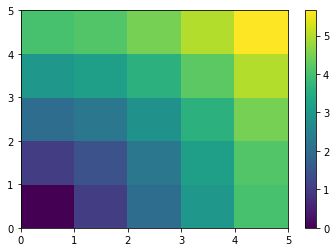

In [151]:
plt.pcolor(distance)
plt.colorbar()

#### Remark 

The numpy.ogrid function allows to directly create vectors x and y of the previous example, with two “significant dimensions”:

In [155]:
help(np.ogrid)

Help on nd_grid in module numpy.lib.index_tricks object:

class nd_grid(builtins.object)
 |  Construct a multi-dimensional "meshgrid".
 |  
 |  ``grid = nd_grid()`` creates an instance which will return a mesh-grid
 |  when indexed.  The dimension and number of the output arrays are equal
 |  to the number of indexing dimensions.  If the step length is not a
 |  complex number, then the stop is not inclusive.
 |  
 |  However, if the step length is a **complex number** (e.g. 5j), then the
 |  integer part of its magnitude is interpreted as specifying the
 |  number of points to create between the start and stop values, where
 |  the stop value **is inclusive**.
 |  
 |  If instantiated with an argument of ``sparse=True``, the mesh-grid is
 |  open (or not fleshed out) so that only one-dimension of each returned
 |  argument is greater than 1.
 |  
 |  Parameters
 |  ----------
 |  sparse : bool, optional
 |      Whether the grid is sparse or not. Default is False.
 |  
 |  Notes
 |  --

In [153]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [154]:
x.shape, y.shape

((5, 1), (1, 5))

In [157]:
distance = np.sqrt(x**2 + y**2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

So, np.ogrid is very useful as soon as we have to handle computations on a grid. On the other hand, np.mgrid directly provides matrices full of indices for cases where we can’t (or don’t want to) benefit from broadcasting.

In [158]:
x, y = np.mgrid[0:4, 0:4]
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [159]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

## 1.3.2.4. Array shape manipulation

### 1.3.2.4.1. Flattening

In [40]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [41]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [42]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

Higher dimensions: last dimensions ravel out “first”.

### 1.3.2.4.2. Reshaping

The inverse operation to flattening.

In [43]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [44]:
b = a.ravel()
b

array([1, 2, 3, 4, 5, 6])

In [46]:
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [47]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [180]:
a.reshape((2, -1)) # unspecified (-1) value is in-ferred

array([[1, 2, 3],
       [4, 5, 6]])

ndarray.reshape may return a view (cf help(np.reshape))), or copy.

In [181]:
b[0, 0] = 99
a

array([[99,  2,  3],
       [ 4,  5,  6]])

Beware: reshape may also return a copy!

In [48]:
a = np.zeros((3, 2))
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [49]:
b = a.T.reshape(3*2)
b

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [184]:
b[0] = 9
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

To understand this you need to learn more about the memory layout of a numpy array.

### 1.3.2.4.3. Adding a dimension

Indexing with the np.newaxis object allows us to add an axis to an array (you have seen this already above in the broadcasting section).

In [185]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [186]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [187]:
z[np.newaxis, :]

array([[1, 2, 3]])

### 1.3.2.4.4. Dimension shuffling

In [189]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [190]:
a.shape

(4, 3, 2)

In [191]:
a[0, 2, 1]

5

In [193]:
b = a.transpose(1, 2, 0)
b

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19]],

       [[ 2,  8, 14, 20],
        [ 3,  9, 15, 21]],

       [[ 4, 10, 16, 22],
        [ 5, 11, 17, 23]]])

In [194]:
b.shape

(3, 2, 4)

In [195]:
b[2, 1, 0]

5

Also creates a view.

In [196]:
b[2, 1, 0] = -1
b

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19]],

       [[ 2,  8, 14, 20],
        [ 3,  9, 15, 21]],

       [[ 4, 10, 16, 22],
        [-1, 11, 17, 23]]])

In [198]:
a[0, 2, 1]

-1

### 1.3.2.4.5. Resizing

Size of an array can be changed with ndarray.resize.

In [199]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

However, it must not be referred to somewhere else.

In [200]:
b = a
a.resize((4,))

ValueError: cannot resize an array that references or is referenced
by another array in this way.  Use the resize function

#### Exercise: Shape manipulations

Look at the docstring for reshape, especially the notes section which has some more information about copies and views.

In [201]:
help(np.reshape)

Help on function reshape in module numpy.core.fromnumeric:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is inferred
        from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the elements
        into the reshaped array using this index order.  'C' means to
        read / write the elements using C-like index order, with the last axis
        index changing fastest, back to the first axis index changing slowest.
        'F' means to read / write the elements using Fortran-like index order,
        with the firs

Use flatten as an alternative to ravel. What is the difference? (Hint: check which one returns a view and which a copy)



In [213]:
a = np.arange(0, 9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [214]:
np.ravel(a) # returns a view

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [215]:
a.flatten() # returns a copy

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Experiment with transpose for dimension shuffling.

In [217]:
a.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

## 1.3.2.5. Sorting data

Sorting along an axis.

In [220]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b # Sorts each row separately!

array([[3, 4, 5],
       [1, 1, 2]])

In-place sort.

In [221]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

Sorting with fancy indexing.

In [222]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [224]:
a[j]

array([1, 2, 3, 4])

Finding minima and maxima.

In [225]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

#### Exercise: Sorting

Try both in-place and out-of-place sorting.

In [231]:
a = np.array([[3, 7, 2], [8, 1, 3]])
a

array([[3, 7, 2],
       [8, 1, 3]])

In [230]:
a.sort()
a

array([[2, 3, 7],
       [1, 3, 8]])

In [232]:
np.sort(a)

array([[2, 3, 7],
       [1, 3, 8]])

Try creating arrays with different dtypes and sorting them.

In [50]:
a = np.ones((3, 3), dtype=bool)
a[2, 2] = 0
a

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True, False]], dtype=bool)

In [51]:
a.sort()
a

array([[ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True]], dtype=bool)

In [250]:
b = np.sort(a)
b

array([[ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True]], dtype=bool)

Use all or array_equal to check the results.

In [251]:
np.array_equal(a, b)

False

Look at np.random.shuffle for a way to create sortable input quicker.

In [259]:
a = np.array([[3, 7, 2], [8, 1, 3]])
a

array([[3, 7, 2],
       [8, 1, 3]])

In [260]:
a.sort()
a

array([[2, 3, 7],
       [1, 3, 8]])

In [261]:
np.random.shuffle(a)
a

array([[1, 3, 8],
       [2, 3, 7]])

Combine ravel, sort and reshape.

In [56]:
a = np.array([[3, 7, 2], [8, 1, 3]])
b = a.ravel()
b
b.sort()
b
b.reshape((2, 3))


array([[1, 2, 3],
       [3, 7, 8]])

## 1.3.2.6. Summary

What do you need to know to get started?

Know how to create arrays : array, arange, ones, zeros.

Know the shape of the array with array.shape, then use slicing to obtain different views of the array: array[::2], etc. Adjust the shape of the array using reshape or flatten it with ravel.

Obtain a subset of the elements of an array and/or modify their values with masks
```
a[a < 0] = 0
```
Know miscellaneous operations on arrays, such as finding the mean or max (array.max(), array.mean()). No need to retain everything, but have the reflex to search in the documentation (online docs, help(), lookfor())!!

For advanced use: master the indexing with arrays of integers, as well as broadcasting. Know more NumPy functions to handle various array operations.

If you want to do a first quick pass through the Scipy lectures to learn the ecosystem, you can directly skip to the next chapter.

The remainder of this chapter is not necessary to follow the rest of the intro part. But be sure to come back and finish this chapter, as well as to do some more exercices.